<a href="https://colab.research.google.com/github/karhol/mock-portfolio/blob/main/Heart_Attack_EDA_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Attack Analysis & Prediction

Dataset:

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import norm

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


import warnings
warnings.filterwarnings(action='ignore')

In [27]:
data = pd.read_csv("heart.csv")
data2 = pd.read_csv("o2Saturation.csv")


In [28]:
data =pd.merge(data, data2, left_index=True, right_index=True)

In [29]:
#data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
 14  98.6      303 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 37.9 KB


In [33]:
data.rename(columns={"98.6":"o2Saturation","trtbps":"blood_pressure","chol":"Cholestoral",
                     "fbs":"fasting_blood_sugar","thalachh":"max_heart_rate","exng":"exercise", "target":"heart_attack"},inplace=True)

In [34]:
data

,age,sex,cp,trestbps,Cholestoral,fasting_blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_attack,o2Saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,97.5
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,97.5
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,97.5
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,97.5


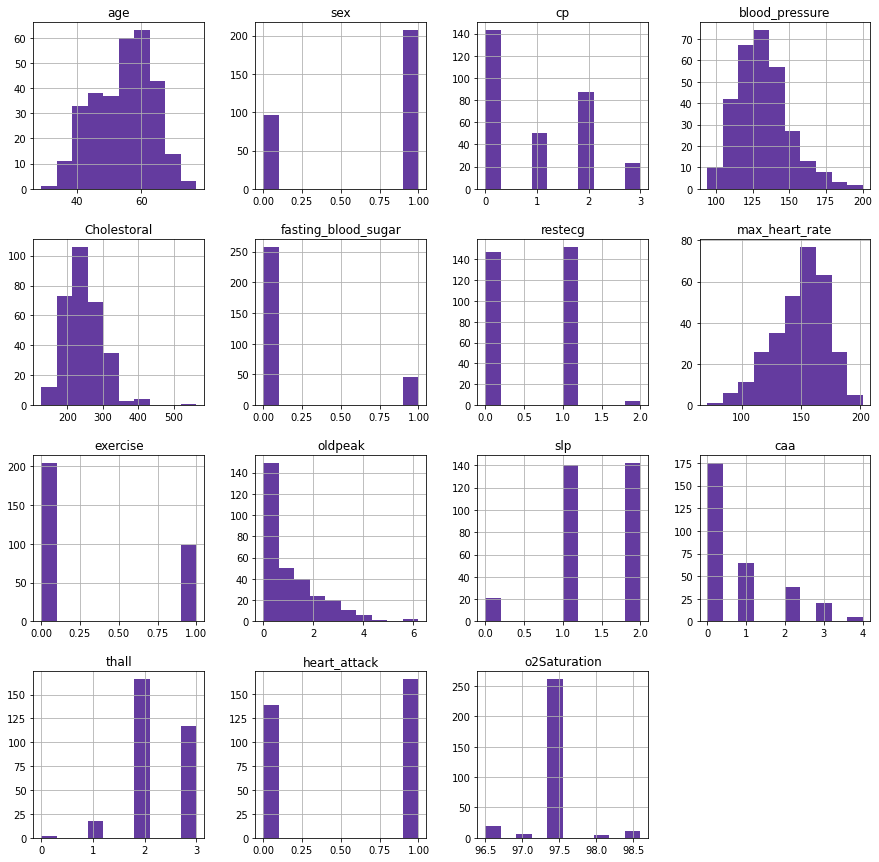

In [ ]:
#or 
hist_plot = data.hist(figsize = (15,15), color = "#643B9F")

Separate Categorical from Continious Features 

In [ ]:
categorical_data = [col for col in data.columns if data[col].nunique() < 8]

In [ ]:
categorical_data

['sex',
 'cp',
 'fasting_blood_sugar',
 'restecg',
 'exercise',
 'slp',
 'caa',
 'thall',
 'heart_attack',
 'o2Saturation']

In [ ]:
numerical_data = [col for col in data.columns if col not in categorical_data] 

In [ ]:
numerical_data

['age', 'blood_pressure', 'Cholestoral', 'max_heart_rate', 'oldpeak']

Pairplot that looks into the Correlation Matrix

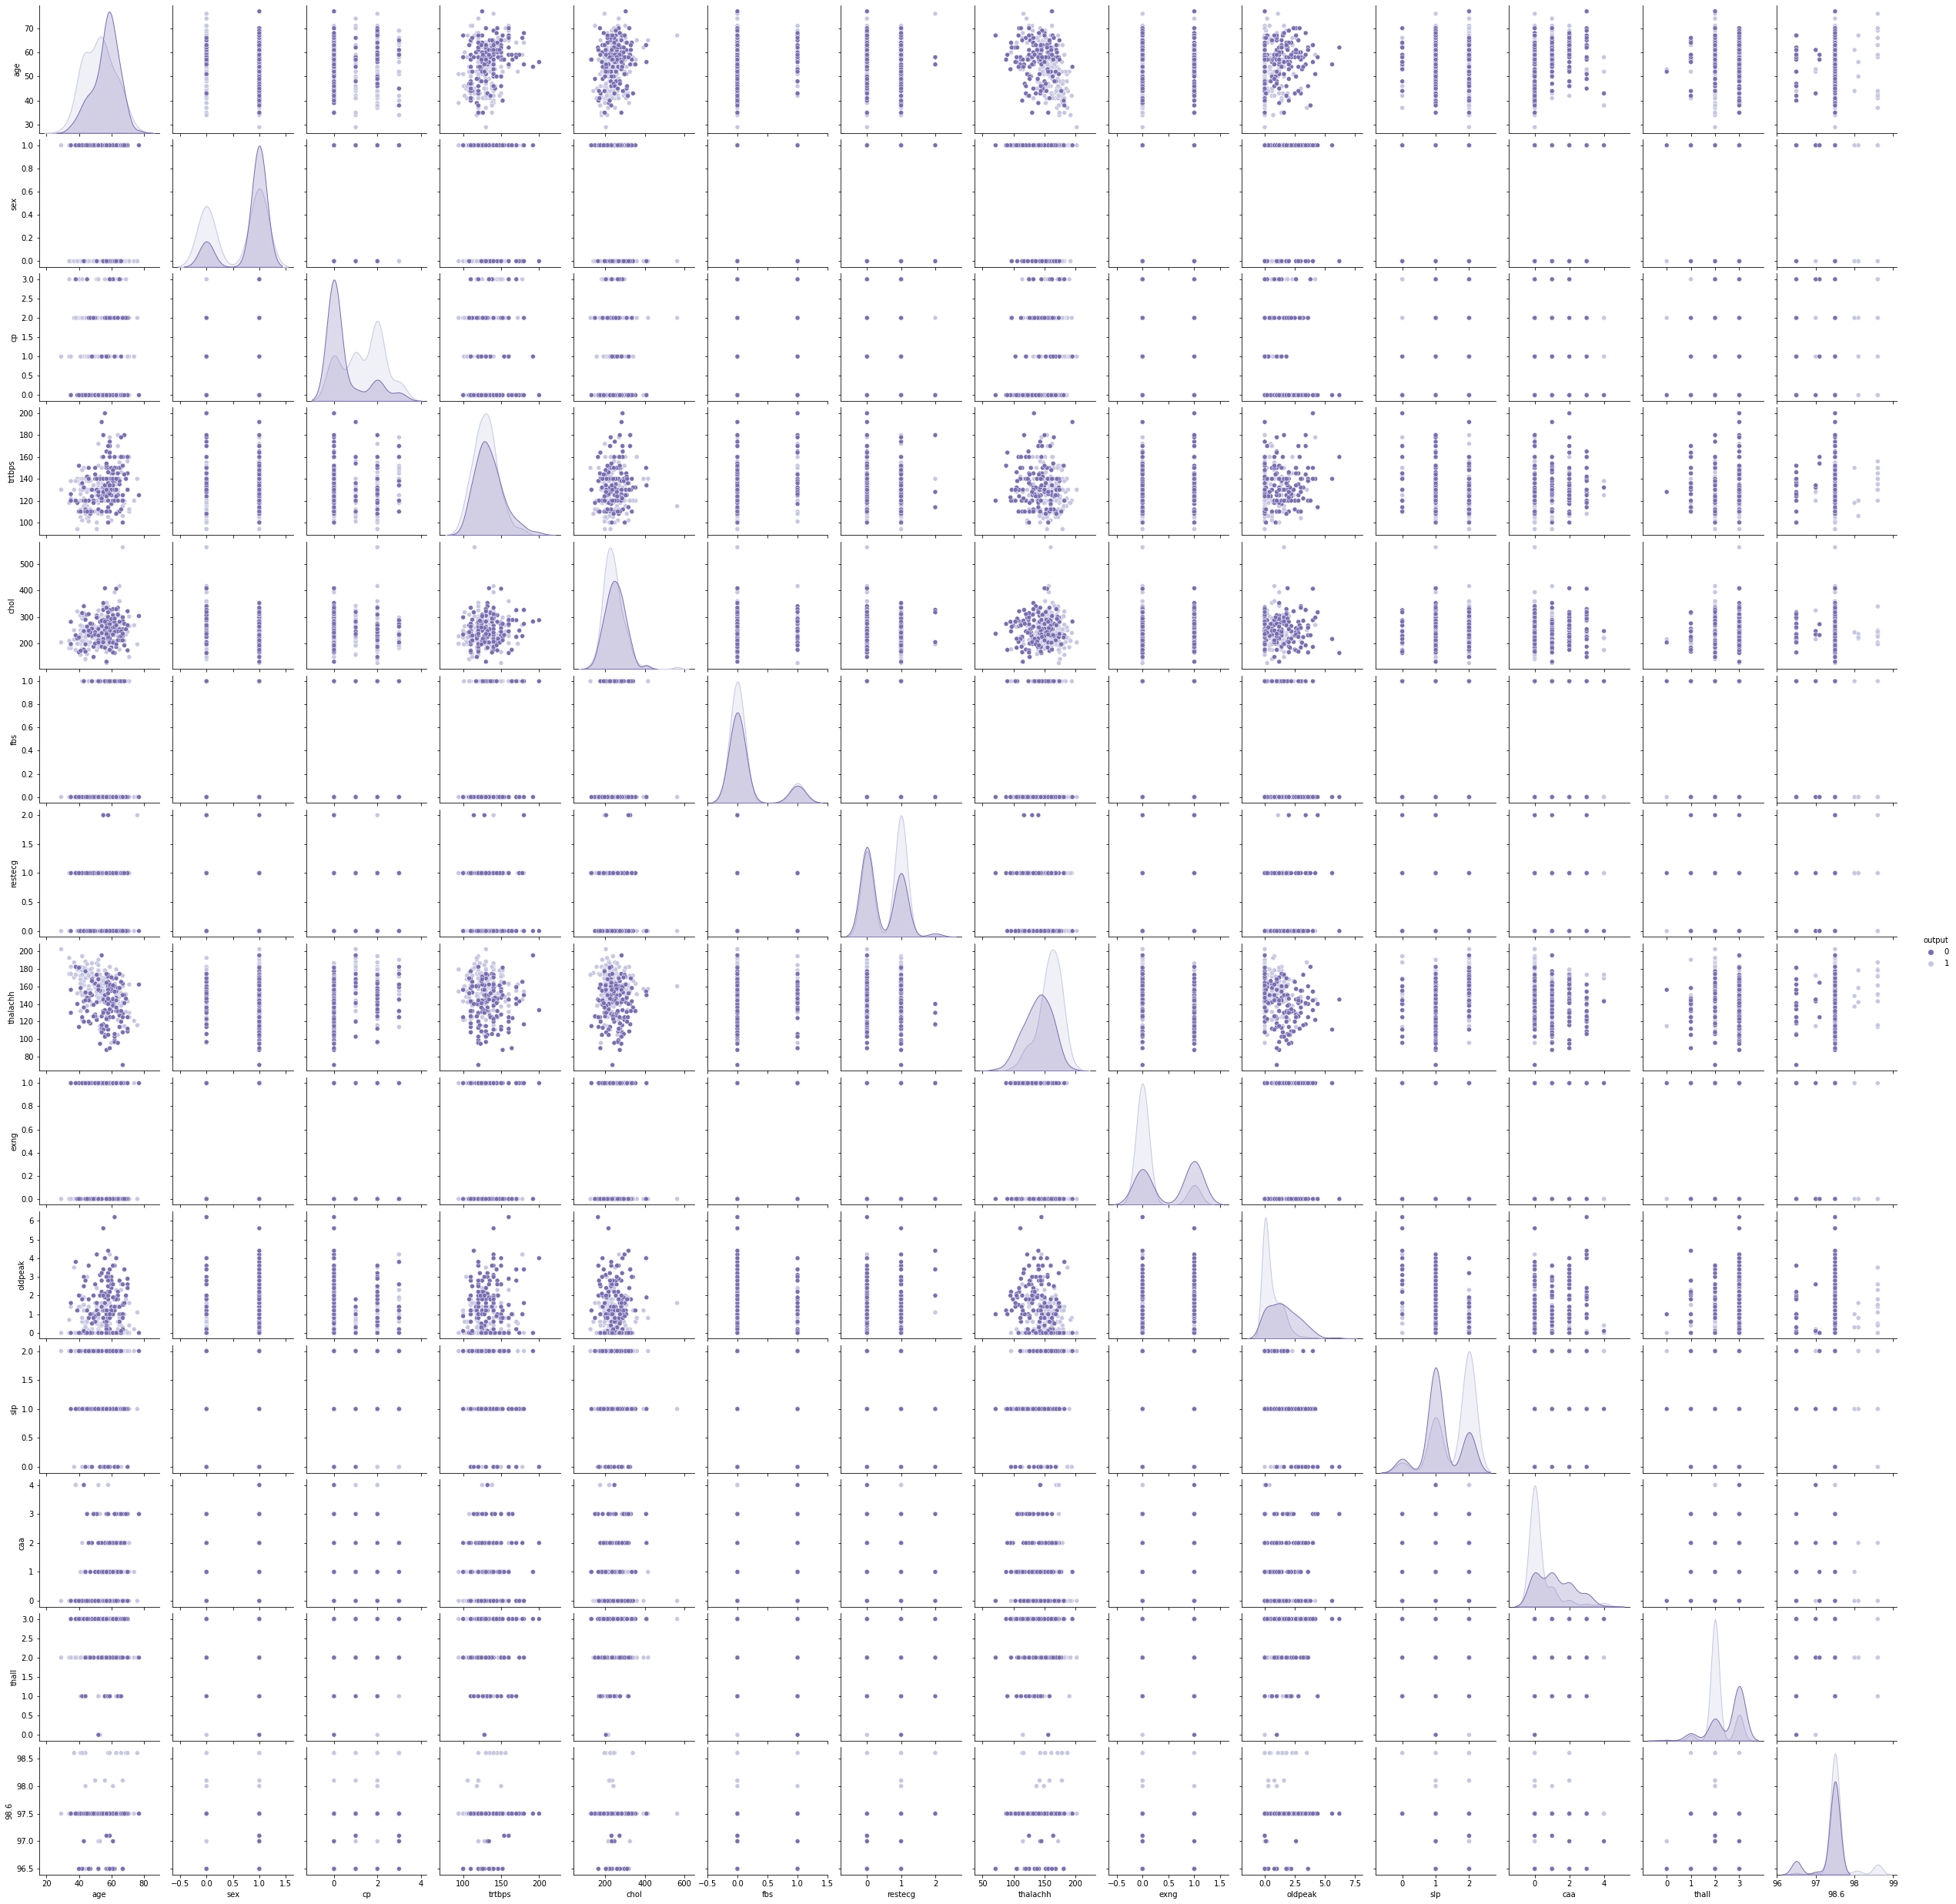

In [ ]:
# Visualizing the correlation of the dataset 
sns.pairplot(data, hue = "output", palette="Purples_r")
plt.show()

Heatmap

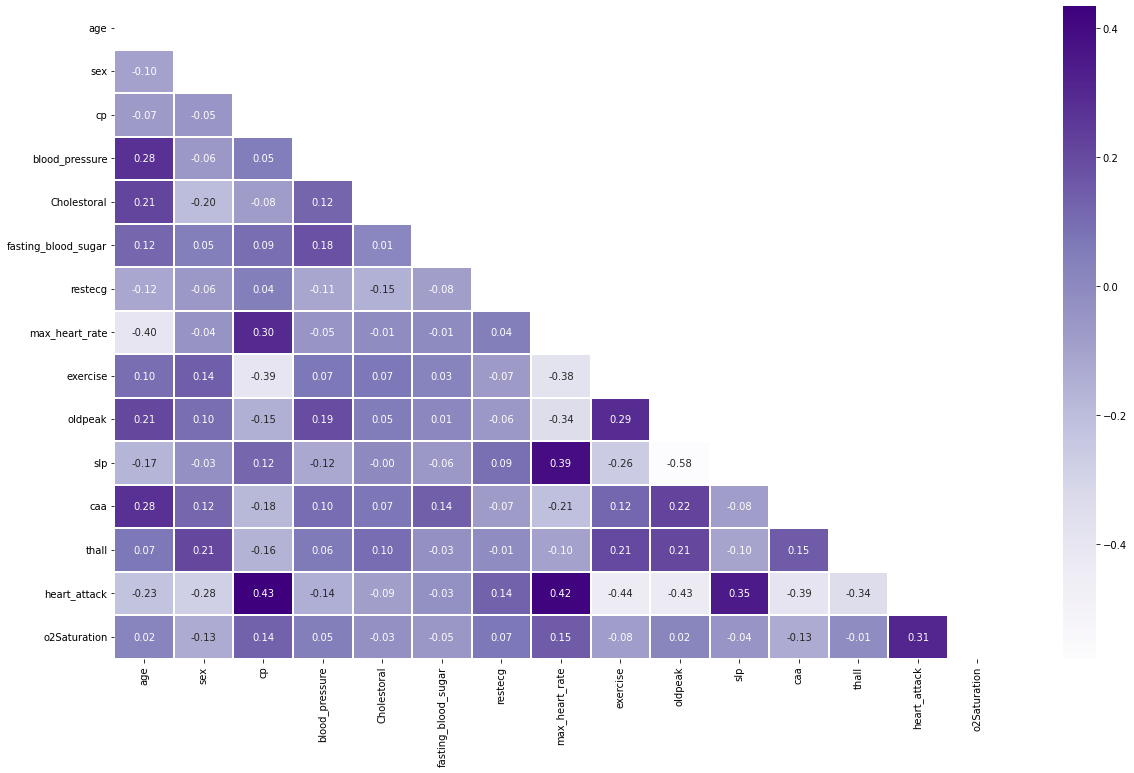

In [ ]:
# heatmap 

plt.figure(figsize = (20, 12))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f", cmap="Purples")
plt.show()

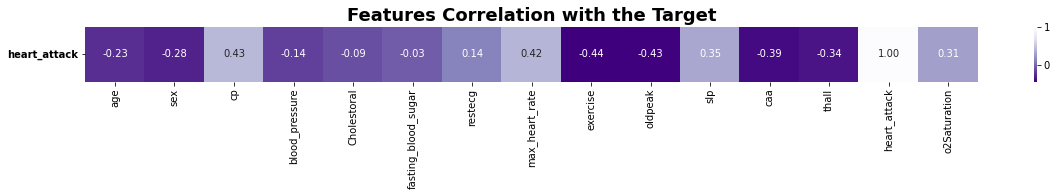

In [ ]:

numeric_corr = data.corr()
f,ax=plt.subplots(figsize=(20,1))
sns.heatmap(numeric_corr.sort_values(by=["heart_attack"], ascending=False).head(1), cmap="Purples_r",annot = True, fmt = ".2f")
plt.title("Features Correlation with the Target", weight="bold", fontsize=18, color="Black")
plt.yticks(weight="bold", color="black", rotation=0)

plt.show()



The feature with highest positive correlation is

    cp : 0.43

The feature with highest negative correlation is

    exercise: -0.44

The feature with lowest correlation is

    fasting_blood_sugar : -0.03


Age Feature

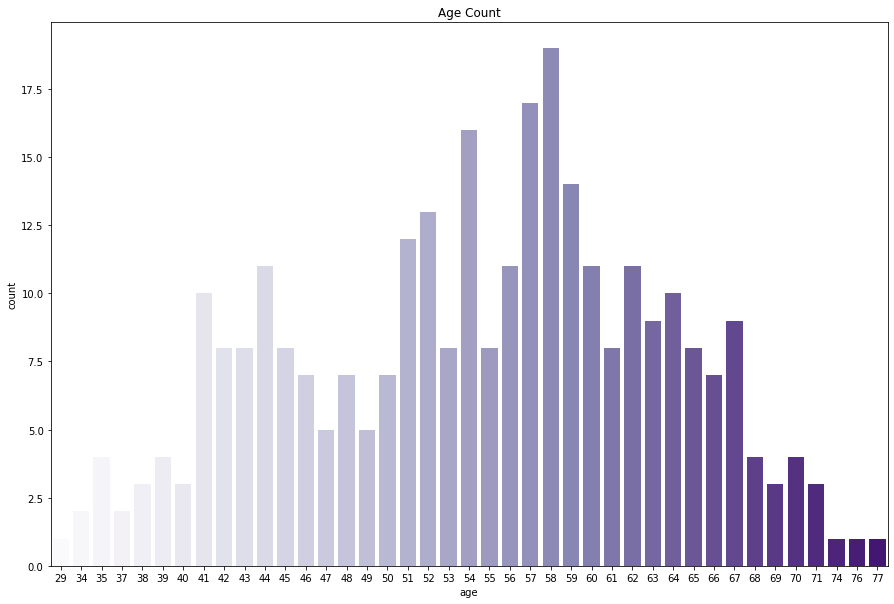

In [ ]:
plt.subplots(figsize=(15,10))
sns.countplot(data=data ,x='age',palette="Purples")  #"viridis"
plt.title( 'Age Count')
plt.show()

<Figure size 720x720 with 0 Axes>

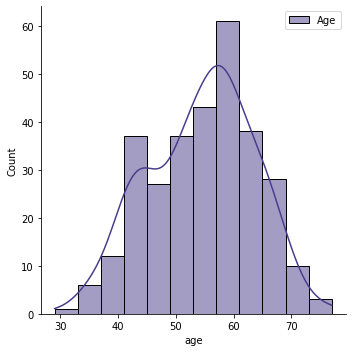

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(data.age, color="darkslateblue", label="Age", kde= True)
plt.legend()

Density distribution is highest in the age group of 55 to 60

In this dataset the youngest person is 29 and the oldest person is 77

In [ ]:
data.loc[(data['age'] ==29)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


In [ ]:
data.loc[(data['age'] ==77)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


later we will learn that 1 in "sex" stands for male

so now we know both the youngest person and the oldest are males

Sex Feature

1    207
0     96
Name: sex, dtype: int64

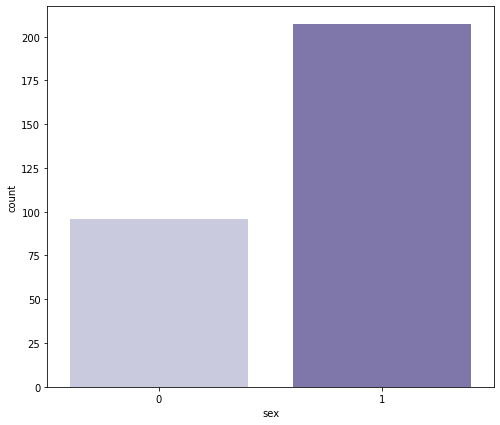

In [ ]:
# countplot
plt.figure(figsize = (8,7))
sns.countplot(x="sex", data=data, palette='Purples')
data["sex"].value_counts()

There are twice as many of sex {1}

We need to find out which are the female and which are the males

reading through the dataset notations there is no mention of who is who, so we are going to need to deduce it ourselves



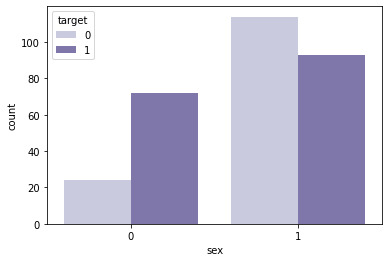

In [ ]:
sns.countplot(x ='sex', hue = "target", data = data, palette="Purples")
# Show the plot
plt.show()

From this we can deduce 

{male :1, female:0}


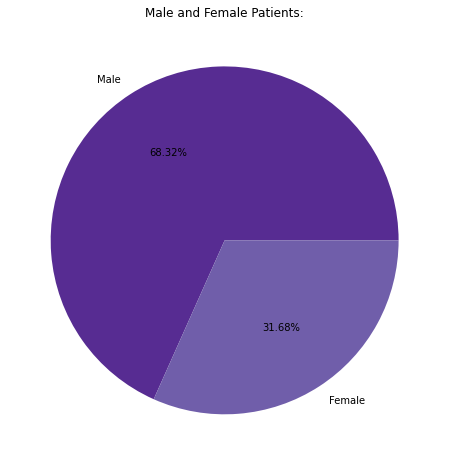

1    207
0     96
Name: sex, dtype: int64

In [ ]:
#or 
plt.figure(figsize=(8, 8))

plt.pie(
    data['sex'].value_counts(),
    autopct='%.2f%%',
    labels=["Male", "Female"],
    colors=sns.color_palette('Purples_r')
)

plt.title("Male and Female Patients:")
plt.show()

data.sex.value_counts()

Splitting the data

In [35]:
# Split df into X and y
y = data['heart_attack']
X = data.drop('heart_attack', axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

Training the models

In [ ]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "                              LightGBM": LGBMClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.
                              LightGBM trained.


In [ ]:
results = []
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))
    results.append(model.score(X_test, y_test) * 100)

                   Logistic Regression: 81.32%
                   K-Nearest Neighbors: 81.32%
                         Decision Tree: 72.53%
Support Vector Machine (Linear Kernel): 81.32%
   Support Vector Machine (RBF Kernel): 80.22%
                        Neural Network: 80.22%
                         Random Forest: 79.12%
                     Gradient Boosting: 69.23%
                               XGBoost: 75.82%
                              LightGBM: 76.92%


In [ ]:
models1 = [item.strip() for item in list(models.keys())]

model_results = pd.DataFrame(
    {'Model': models1,
     'Test_score': results,
    })

display(model_results.style.background_gradient(cmap='Purples'))

,Model,Test_score
0,Logistic Regression,81.318681
1,K-Nearest Neighbors,81.318681
2,Decision Tree,72.527473
3,Support Vector Machine (Linear Kernel),81.318681
4,Support Vector Machine (RBF Kernel),80.219780
5,Neural Network,80.219780
6,Random Forest,79.120879
7,Gradient Boosting,69.230769
8,XGBoost,75.824176
9,LightGBM,76.923077


Three Best Models:

* Logistic Regression

* K-Nearest Neighbors

* Support Vector Machine



K-Nearest Neighbors and the Elbow method

In [36]:
from sklearn.model_selection import cross_val_score

accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X_train, y_train, cv=10)
    accuracy_rate.append(score.mean())

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X_train, y_train, cv=10)
    error_rate.append(1-score.mean())



Text(0, 0.5, 'Error Rate')

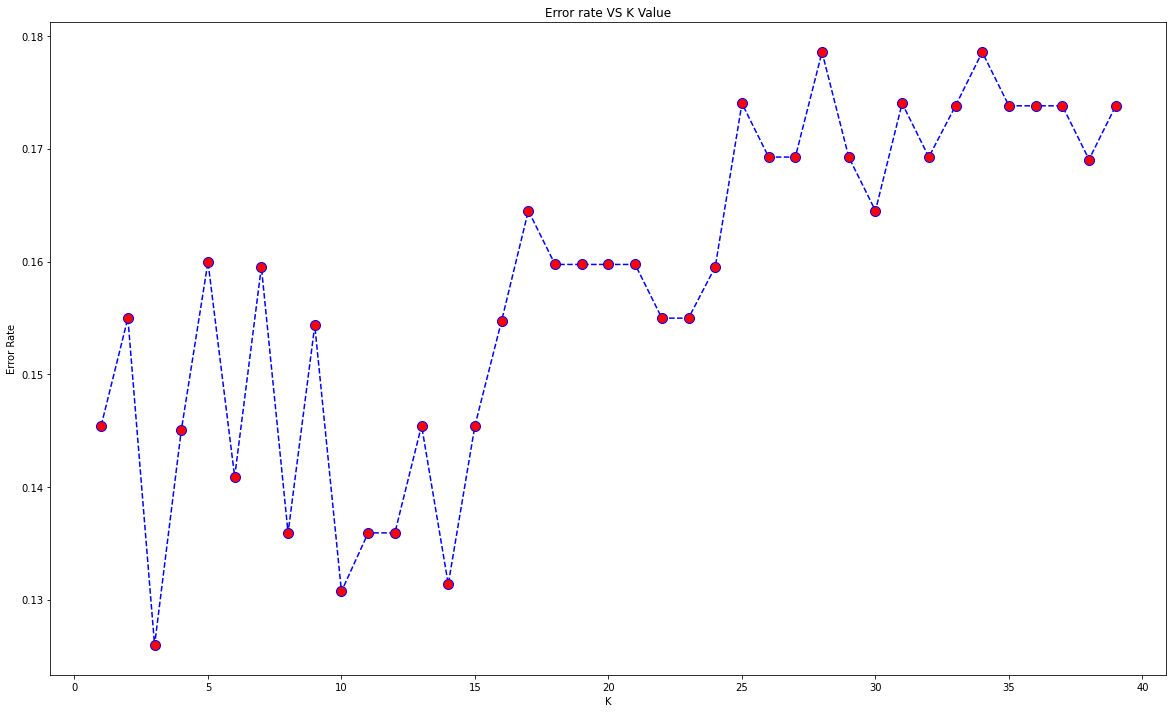

In [38]:
plt.figure(figsize=(20,12))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error rate VS K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [46]:
# First a quick comparison to our original K=17

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K+4')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

print("Test_ score : ",knn.score(X_test, y_test) * 100)

WITH K+4


[[35  6]
 [11 39]]


              precision    recall  f1-score   support

           0       0.76      0.85      0.80        41
           1       0.87      0.78      0.82        50

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91

Test_ score :  81.31868131868131


we tried the elbow method but in reality the model is already preforming at its best.

References:

https://www.kaggle.com/code/kanberburak/advanced-eda

https://www.kaggle.com/code/asimislam/tutorial-python-subplots

https://www.kaggle.com/code/asimislam/python-colors-color-cmap-palette

https://www.kaggle.com/code/milanvaddoriya/knn-with-pca-and-elbow-method-for-beginners